1. Find all variables and understand them

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# read dataset
data = pd.read_csv('credit_risk.csv')
# show the first ten instances
data.head(10)


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
5,no checking,36.0,existing paid,education,9055.0,no known savings,1<=X<4,2.0,male single,none,...,no known property,35.0,none,for free,1.0,unskilled resident,2.0,yes,yes,good
6,no checking,24.0,existing paid,furniture/equipment,2835.0,500<=X<1000,>=7,3.0,male single,none,...,life insurance,53.0,none,own,1.0,skilled,1.0,none,yes,good
7,0<=X<200,36.0,existing paid,used car,6948.0,<100,1<=X<4,2.0,male single,none,...,car,35.0,none,rent,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
8,no checking,12.0,existing paid,radio/tv,3059.0,>=1000,4<=X<7,2.0,male div/sep,none,...,real estate,61.0,none,own,1.0,unskilled resident,1.0,none,yes,good
9,0<=X<200,30.0,critical/other existing credit,new car,5234.0,<100,unemployed,4.0,male mar/wid,none,...,car,28.0,none,own,2.0,high qualif/self emp/mgmt,1.0,none,yes,bad


In [29]:
numerical_cols = data.select_dtypes(include = ['int','float'])
summary = numerical_cols.describe()
print(summary)

          duration  credit_amount  installment_commitment  residence_since  \
count  1000.000000    1000.000000             1000.000000      1000.000000   
mean     20.903000    3271.258000                2.973000         2.845000   
std      12.058814    2822.736876                1.118715         1.103718   
min       4.000000     250.000000                1.000000         1.000000   
25%      12.000000    1365.500000                2.000000         2.000000   
50%      18.000000    2319.500000                3.000000         3.000000   
75%      24.000000    3972.250000                4.000000         4.000000   
max      72.000000   18424.000000                4.000000         4.000000   

               age  existing_credits  num_dependents  
count  1000.000000       1000.000000     1000.000000  
mean     35.546000          1.407000        1.155000  
std      11.375469          0.577654        0.362086  
min      19.000000          1.000000        1.000000  
25%      27.000000    

In [30]:
# calculate Mean and Standard Deviation
numeric_variables = data.select_dtypes(include = np.number)
statistics = numeric_variables.describe()
mean = statistics.loc['mean']
std = statistics.loc['std']
print(f"the numeric_columns mean:\n{mean}")
print(f"the numeric_columns standard Deviation:\n{std}")

the numeric_columns mean:
duration                    20.903
credit_amount             3271.258
installment_commitment       2.973
residence_since              2.845
age                         35.546
existing_credits             1.407
num_dependents               1.155
Name: mean, dtype: float64
the numeric_columns standard Deviation:
duration                    12.058814
credit_amount             2822.736876
installment_commitment       1.118715
residence_since              1.103718
age                         11.375469
existing_credits             0.577654
num_dependents               0.362086
Name: std, dtype: float64


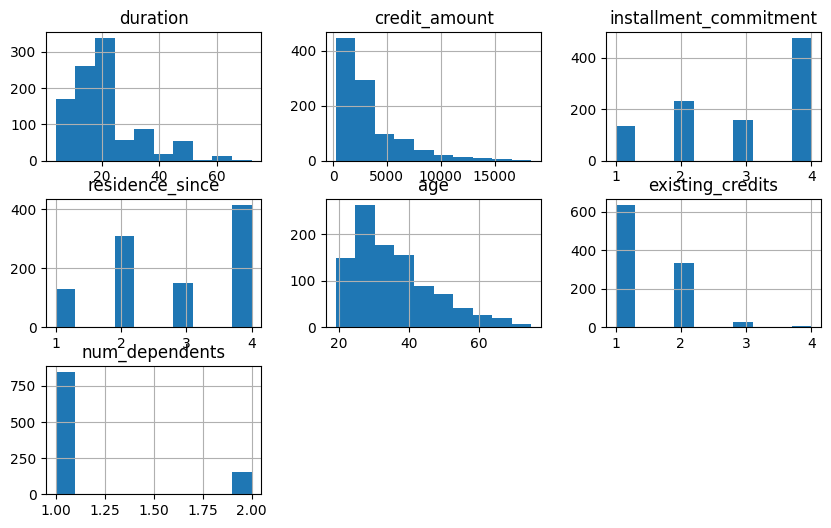

In [31]:
# histograms
numeric_variables.hist(bins=10, figsize=(10, 6))
plt.show()

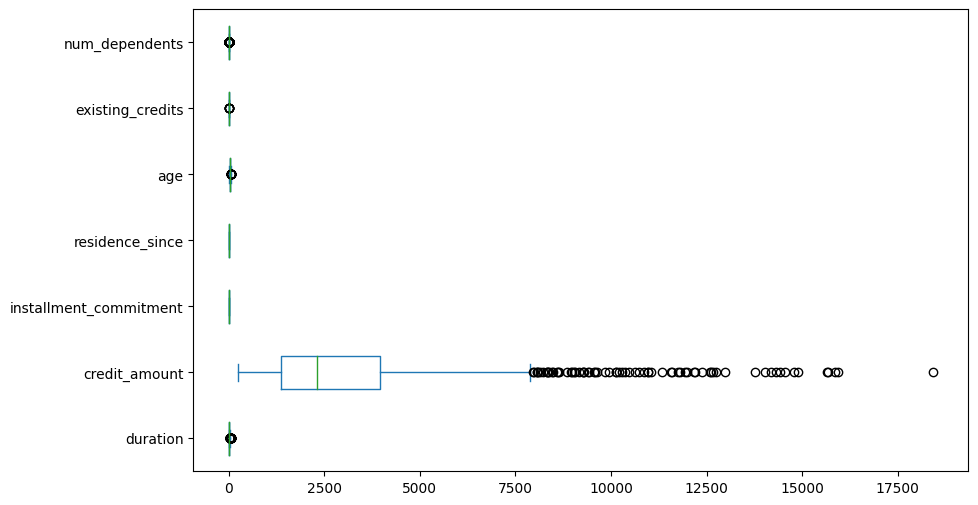

In [32]:
# Boxplot
numeric_variables.plot(kind='box', vert=False, figsize=(10, 6))
plt.show()

In [33]:
# Convert the data types
def convert_data_type(data_type):
    if data_type == "employed":
        return 0
    elif data_type == "<1":
        return 1
    elif data_type == "1<=X<4":
        return 2
    elif data_type == "4<=X<7":
        return 3
    elif data_type == ">=7":
        return 4
    else:
        return None  # Return None for any other values

# Example usage:
data_type = "1<=X<4"
converted_value = convert_data_type(data_type)
print(converted_value)


2


2.Visualise data

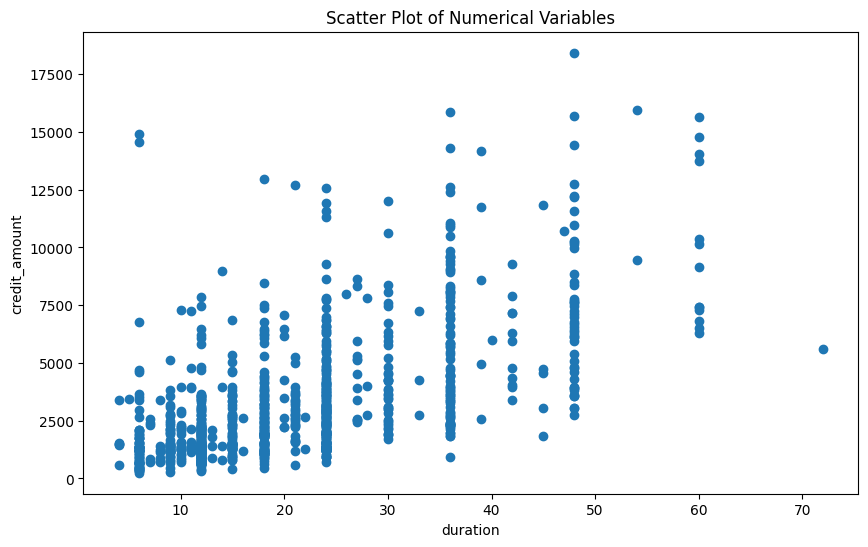

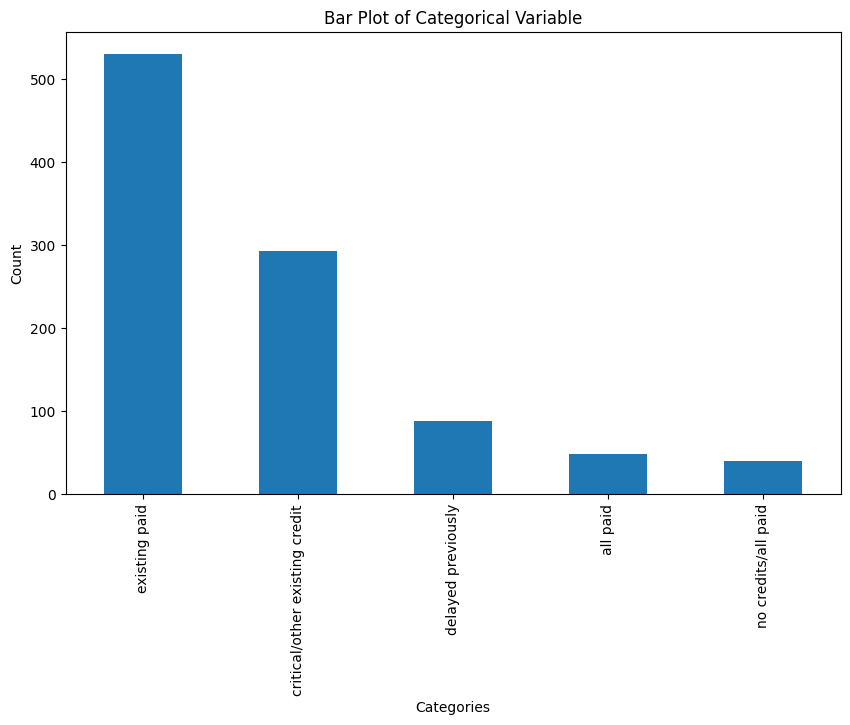

In [34]:
import matplotlib.pyplot as plt

# Visualize numerical variables
plt.figure(figsize=(10, 6))
plt.scatter(data['duration'], data['credit_amount'])
plt.xlabel('duration')
plt.ylabel('credit_amount')
plt.title('Scatter Plot of Numerical Variables')
plt.show()

# Visualize categorical variables
plt.figure(figsize=(10, 6))
data['credit_history'].value_counts().plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar Plot of Categorical Variable')
plt.show()


3. clean data

In [35]:
# Handle missing values
data = data.dropna()

# Drop entire attribute containing missing values
data = data.dropna(axis=1)

# Impute missing values for a particular attribute
data['credit_amount'] = data['credit_amount'].fillna(mean)


4. Identify correlated variables

In [38]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


e:\2023-phrase-2 data science Dan WEI\venv\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
e:\2023-phrase-2 data science Dan WEI\venv\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


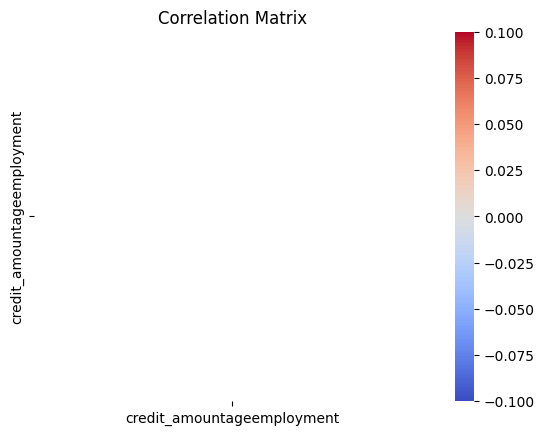

In [40]:
import seaborn as sns
data_encoded = pd.get_dummies('employment','credit_amount','age')
correlation_matrix = data_encoded.corr()

plt.figure()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



5. Summary

# Summary:
During the exploratory data analysis (EDA) and preprocessing phase, the following steps were performed:

1. Variables were identified and understood by loading the dataset and displaying the first ten instances.
2. Numerical summaries were generated, including the mean and standard deviation of the numerical columns.
3. Graphical summaries were created, like histograms for numerical columns, and box and whisker plots for visualizing data distributions and outliers.
4. Data types were converted if necessary to ensure that all values were numerical for machine learning purposes.
5. The data was visualized using various plots to identify trends, patterns, and anomalies.
6. Data cleaning steps were performed, including handling missing values (dropping instances or imputing missing values), dealing with outliers (removing or standardizing them), addressing imbalanced data (undersampling or oversampling), and selecting relevant features for modeling.
7. Correlations between variables were analyzed using a correlation matrix and visualized using a heatmap.
8. A summary was written, highlighting the steps taken during EDA and preprocessing, as well as any interesting findings or observations made during the process.

